# 小象学院实践课
## 集成学习
## 泰坦尼克号幸存者预测

欢迎来到小象学院实践课！在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以**'练习'**开始的标题表示接下来的代码部分中有你必须要实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以'TODO'标出。请仔细阅读所有的提示！

除了实现代码外，你还必须回答一些与项目和你的实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。我们将根据你对问题的回答和撰写代码所实现的功能来对你提交的项目进行评分。
>**提示：**Code 和 Markdown 区域可通过**Shift + Enter**快捷键运行。此外，Markdown可以通过双击进入编辑模式



## 开始
泰坦尼克号的沉没是历史上最臭名昭着的沉船之一。 1912年4月15日，在她的第一次航行中，泰坦尼克号在与冰山相撞后沉没，在2224名乘客和机组人员中造成1502人死亡。造成海难失事的原因之一是乘客和机组人员没有足够的救生艇。 尽管幸存生存下来有一些运气因素，但有些人比其他人更容易生存，比如女人，孩子和上流社会。

在这个挑战中，我们要求您完成对哪些人可能存活的分析，我们要求您运用机器学习工具来预测哪些乘客幸免于悲剧。

> 数据集出自Kaggle. (https://www.kaggle.com/c/titanic) 在完成作业后，同学们可以将自己的结果在该页面提交来检验效果。

----
## 探索数据

### 数据载入
运行下面的代码单元以载入需要的Python库并导入数据。注意数据集的`'Survived'`将是我们需要预测的列（表示乘客是否存活，1为是，0为否），数据中的其他每一列都将是关于乘客的特征。

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler 
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

# train.csv中为训练数据，用于训练和效果检测
train = pd.read_csv('./all/train.csv')
y = train['Survived']

# test.csv为已经去除Survived列的数据，使用训练好的模型对其进行拟合，将结果提交即可完成Kaggle任务
test = pd.read_csv('./all/test.csv')

# 查看一下训练和测试数据大小分别是多少
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


查看一下训练数据：

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


可以看到我们有如下几个特征:
* Age：年龄
* Cabin：舱位号码
* Embarked：上船港口
* Fare：票价
* Name：名字
* Parch：直系亲属
* PassengerId：用户编号
* Pclass：舱位等级
* Sex：性别
* SibSp：旁系亲属
* Survived: 是否存活
* Ticket：票号


### 特征与目标相关性

数据特征数不多，接下来我们尝试构建一个函数，通过绘制柱形图展示出类别型特征与目标特征之间的关系。

In [3]:
import matplotlib.pyplot as plt

# 定义画布尺寸
plt.figure(figsize=(10, 4))

def showSurvivalRate(df, column_name):
    """
        通过柱形图展示数据特征与目标特征之间的关系。
        横坐标为希望考察的特征属性，纵坐标为生存率。
        
        输入参数：
        df：需要考察的数据，存储类型为DataFrame
        column_name: 需要考察的属性名字。
    """
    
    # TODO
    # 构建一个dataframe类型的结果result_df。
    # result_df由两列组成，一列由参数df中的名为column_name的列的可能取值组成；另一列，名为'Survival Rate'，是该取值所对应的存活率。
    # 比如当输入column_name为'Pclass'时，计算出的result_df结果为（第一列列名与传入的列名column_name相同，第二列列名为'Survival Rate'）：
    #   Pclass  Survival Rate
    #        1  0.629630
    #        2  0.472826
    #        3  0.242363
    # 表示不同等级仓位旅客的存活率
    r = []
    vc = df[column_name].value_counts()
    for col in vc.index:
        ratio = len(df[(df['Survived']==1) & (df[column_name]==col)])/vc[col]
        r.append([col,ratio])
    
    results_df = pd.DataFrame(r,columns=[column_name,'Survival Rate'])
    results_df.set_index(column_name,inplace=True)
    
    # 绘制柱形图
    results_df.plot(y=['Survival Rate'], kind='bar', title="Survival Rate", legend=False)
    plt.show()

<Figure size 720x288 with 0 Axes>

接下来我们来看一下各个特征对于最终存活率的影响吧。 我们先从类别型属性开始：

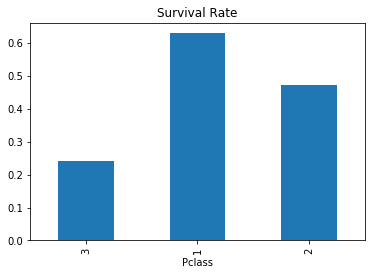

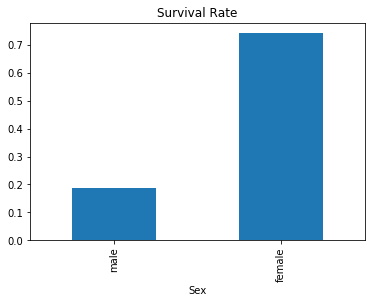

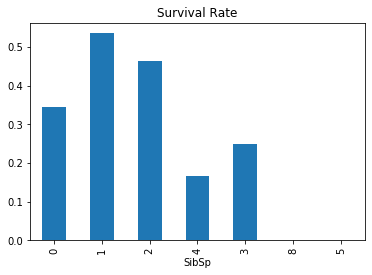

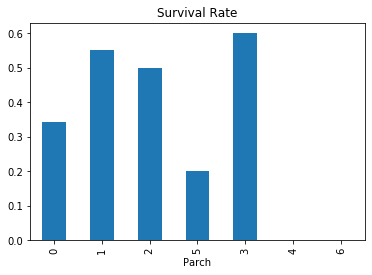

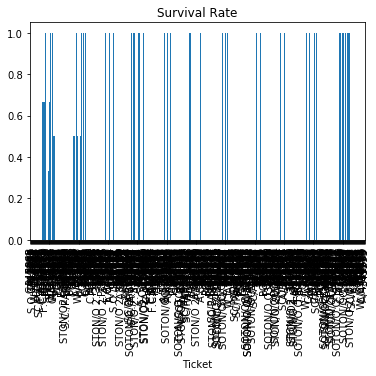

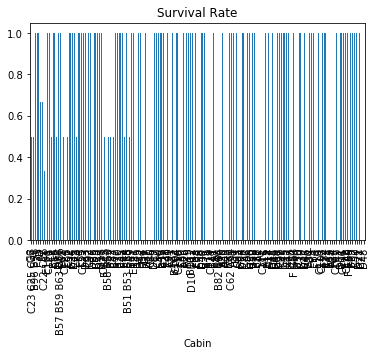

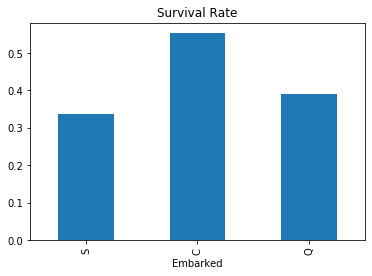

In [4]:
# 获取所有数据列的名字
columns = train.columns.values.tolist()

# 排除目标列
columns.remove('Survived')

# 去除连续特征Age和Fare
columns.remove('Age')
columns.remove('Fare')

# 从直觉判断上，我们认为名字、PassengerId（用户ID）、Ticket（票号）这些是每个人都不同的随机属性，与结果关系不大，先将它们也排除
columns.remove('PassengerId')
# columns.remove('Ticket')
columns.remove('Name')

# 调用showSurvivalRate绘制柱形图，观察各属性与Survived的关系
for item in columns:
    showSurvivalRate(train, item)


留意绘制的图形，绝大部分特征不同取值所对应的生存率都有明显的差别，将它们作为预测Survived的依据应该比较可靠。

唯一例外的，我们关注一下属性Cabin（仓位号码）。可能对豪华邮轮的仓位不太熟悉，我们一开始以为仓位号码是每位乘客都不一样，这样它将与PassengerId一样，不具备可预测目标属性的区分度。

**问题： ** 从图中，你是否能判断出Cabin属性不是每位乘客都不相同？理由是？

**回答： **回答：可以。如果每个仓位只是一个乘客的话，那么这个仓位的存活率是0或1，而不是其余值。图中有其余值，说明这些仓位有的人存活，有的人没有存活。 ****

我们对Cabin中生存率大于零小于一的那些乘客做下观察：

In [5]:
# TODO
# 将不同Cabin所对应的生存率计算出来，并存储在DataFrame类型的变量rate中
r = []
vc = train['Cabin'].value_counts()
for col in vc.index:
    ratio = len(train[(train['Survived']==1) & (train['Cabin']==col)])/vc[col]
    r.append([col,ratio])

rate = pd.DataFrame(r,columns=['Cabin','Survival Rate'])

# TODO
# 遍历rate中的元素，将Survived大于零小于1的项打印出来
print(rate[(rate['Survival Rate']>0) & (rate['Survival Rate']<1)])

          Cabin  Survival Rate
0            G6       0.500000
1   C23 C25 C27       0.500000
4             D       0.666667
5            F2       0.666667
6       C22 C26       0.333333
9            C2       0.500000
11          C65       0.500000
14          E67       0.500000
16          C68       0.500000
20          C78       0.500000
32         C123       0.500000
34      B58 B60       0.500000
35          B22       0.500000
36          C83       0.500000
41          E44       0.500000
43  B51 B53 B55       0.500000


观察下输出结果，我们打印一下Cabin为E44的那些乘客的信息：

In [6]:
# TODO
# 打印一下Cabin为G6的那些乘客的信息
train[train['Cabin']=='E44']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
434,435,0,1,"Silvey, Mr. William Baird",male,50.0,1,0,13507,55.9,E44,S
577,578,1,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.0,1,0,13507,55.9,E44,S


首先我们了解了同个仓位中可以有多名乘客，然后，通过他们的Name，不难判断这是一对夫妻。

从这里，我们得到启示：

1. 在test集数据中，Cabin应是另外一批值，直接使用Cabin作为训练属性没什么意义。

2. 从E44这个例子看，Name这个字段应该还是有意义的，它第一个逗号之后的title（例子中是Mrs., Mr.）可能也是可以考虑的影响是否生存的因素。

接下来，我们考察名字中的title和存活率之间的关系：

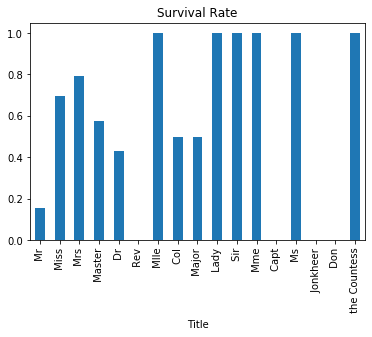

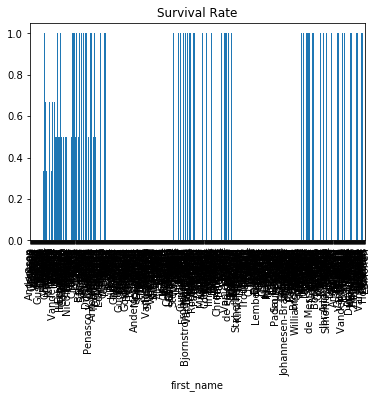

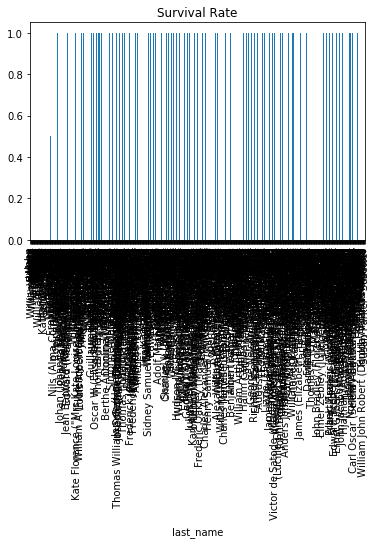

In [7]:
# TODO
# 实现一个函数get_title,将title（名字第一个逗号后以点结尾的部分）提取出来
def get_title(name):
    return name.apply(lambda x :x.split(',')[1].split('.')[0])

# 显示Title与存活率的关系
title_df = pd.DataFrame()
title_df['Survived'] = train['Survived']
title_df['Title'] = get_title(train['Name'])

showSurvivalRate(title_df, 'Title')

def get_middle_str(name):
    return name.split(',')[1].split('.')[0]
def get_first_str(name):
    return name.split(',')[0]
def get_last_str(name):
    return name.split(',')[1].split('.')[1]
title_df['first_name'] = train['Name'].apply(get_first_str)
title_df['last_name'] = train['Name'].apply(get_last_str)
showSurvivalRate(title_df, 'first_name')
showSurvivalRate(title_df, 'last_name')

对于Title，还有些情况需要我们考虑，先看下Title的取值：

In [8]:
title_df['Title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Col               2
 Major             2
 Lady              1
 Sir               1
 Mme               1
 Capt              1
 Ms                1
 Jonkheer          1
 Don               1
 the Countess      1
Name: Title, dtype: int64

重新定义函数get_title_optimize，对于那些出现次数少于10的title统一称为Misc，大于10次的保留原来函数get_title相同的逻辑：

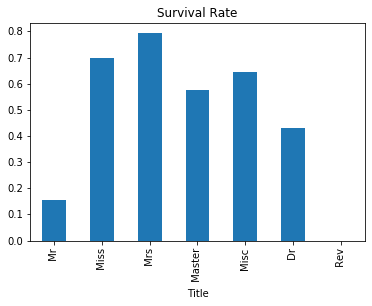

In [10]:
# TODO
# 定义函数get_title_optimize,将title（名字第一个逗号后以点结尾的部分）提取出来。
# 同时，如果title在输入数据集name中出现的次数小于10，统一称为Misc
def get_title_optimize(name):
    name_title = name.apply(lambda x :x.split(',')[1].split('.')[0])
    vc = name_title.value_counts()
    return name_title.apply(lambda x: 'Misc' if vc[x] <5 else x)

# 显示Title与存活率的关系
title_df = pd.DataFrame()
title_df['Survived'] = train['Survived']
title_df['Title'] = get_title_optimize(train['Name'])

showSurvivalRate(title_df, 'Title')

### 定义类别属性处理函数

至此，总结以上的探索结论，我们定义一个类别属性处理函数。函数所要进行的操作是：

1. 生成一个新列，名为Title，该列值通过调用函数get_title_optimize得到（Title是将Name中的第一个逗号之后的，点之前的部分提取出来，如果在整个列中，某个Title出现总数小于10，将其命名为Misc）。

2. 去除无关的属性列'PassengerId'、'Ticket'、'Name'、'Cabin'。

3. 对各属性进行独热编码。

In [11]:
def handle_categorical_feature(data):
    """
        类别型属性处理函数。
        完成功能：
        1. 生成一个新列，名为Title，该列值通过调用函数get_title_optimize得到（Title是将Name中的第一个逗号之后的，点之前的部分提取出来，如果在整个列中，某个Title出现总数小于10，将其命名为Misc）。
        2. 去除无关的属性列'PassengerId'、'Ticket'、'Name'、'Cabin'。
        3. 对各属性进行独热编码。
        
        所有的操作不改变输入参数data原先所指向数据结构的内容。
        
        输入参数：
        data：需要处理的DataFrame类型数据
        
        输出：
        经过如上处理之后的DataFrame数据（新生成的数据结构，不改变输出变量data的内容）。
    """
    # TODO
    # 定义类别属性处理函数handle_categorical_feature的以上逻辑
    data_t = pd.DataFrame(data)
    data_t['Title'] = get_title_optimize(data['Name'])
    unused_col = ['PassengerId','Ticket','Name','Cabin']
    data_t.drop(columns=unused_col,inplace=True)
    return pd.get_dummies(data_t)

### 处理数值型属性

数据中的数值型属性是'Age'和'Fare'，考察一下它们的分布：

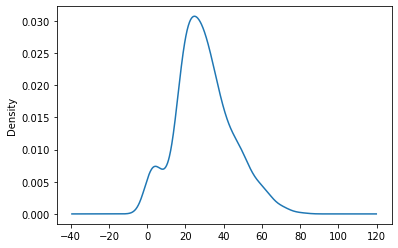

In [12]:
# 绘制Age的取值分布图
train['Age'].plot(kind = 'kde')

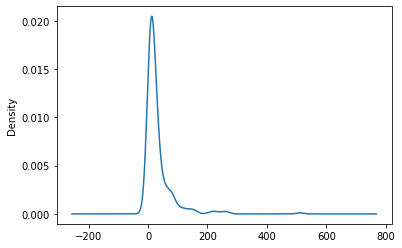

In [13]:
# 绘制Fare的分布图
train['Fare'].plot(kind = 'kde')

根据对取值分布的观察，定义一个函数handle_number_feature，完成功能：

1. 对输入dataframe中的'Age'及'Fare'列进行正态标准化处理（使用StandardScaler），生成新的列数据分别命名为'Age_scal'、'Fare_scal'。

2. 将标准化处理之后的结果列与输入的数据拼接，并将原有的Age和Fare列删除。

In [14]:
from sklearn.preprocessing import StandardScaler

def handle_number_feature(data):
    """
        数值型属性处理函数。
        完成功能：
        1. 对输入dataframe中的'Age'及'Fare'列进行正态标准化处理（使用StandardScaler），生成新的列数据分别命名为'Age_scal'、'Fare_scal'。
        2. 将标准化处理之后的结果列与输入的数据拼接，并将原有的Age和Fare列删除。
        
        所有的操作不改变输入参数data原先所指向数据结构的内容。
        
        输入参数：
        data：需要处理的DataFrame类型数据
        
        输出：
        经过如上处理之后的DataFrame数据（新生成的数据结构，不改变输出变量data的内容）。
    """
    
    # TODO
    # 完成以上所述数值型属性的处理函数逻辑
    data_t = pd.DataFrame(data)
    scaler = StandardScaler()
    data_t['Age_scal'] = scaler.fit_transform(data['Age'].values.reshape(-1,1))
    data_t['Fare_scal'] = scaler.fit_transform(data['Fare'].values.reshape(-1,1))
    data_t.drop(columns=['Age','Fare'],inplace=True)
    return data_t
    

### 数据整合处理

使用以上已经定义好的处理方法，我们对所有不同类别的数据进行处理。我们可以预期，当数据经过转换之后，使用train训练出来的模型，当输入test数据集之后，得到的结果便是我们希望获得的。

如果我们对train数据集进行了一系列操作，这些操作同样要作用于test数据集，才可以获得正确的结果。所以，在对训练属性进行处理的时候，我们将test数据集也一并加进来。

In [15]:
# 将train中的目标列 Survived删除
train.drop(['Survived'], axis = 1, inplace = True)

# 将train与test做拼接，方便对数据整体进行处理
data = pd.concat([train, test], axis = 0, ignore_index = True)

# 查看一下train的数据完整性
train.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [16]:
# 查看一下合并数据data的完整性
data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

这里将test引入到train中组成data进行整体考虑，我们可以看到在test中的空值列比train更多了，所以将他们整体考虑以做空值处理，期望能得到更好的效果。

关注不完整的列'Age'、'Cabin'、'Embarked'、'Fare'。 根据之前我们的讨论，'Cabin'列将会被删除，所以对于剩下的'Age'、'Embarked'、'Fare'三列进行处理。

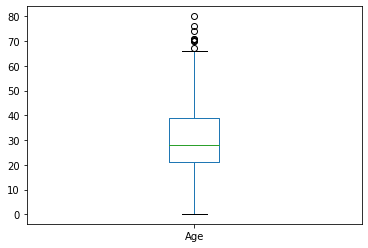

In [17]:
# TODO
# 绘制'Age'列的箱线图
data['Age'].plot.box()

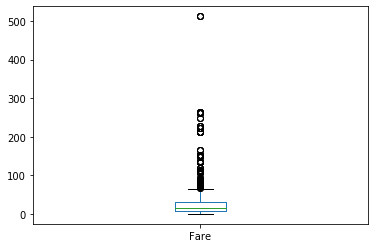

In [18]:
# TODO
# 绘制'Fare'列的箱线图
data['Fare'].plot.box()

Fare列中存在大量的异常值，我们采用中位数对该列做空值填充。对于Age列，我们使用平均值做填充。

In [46]:
# TODO
# 使用中位数填充data的Fare列中的空值，结果重新赋值给data
data['Fare'].fillna(data['Fare'].median(),inplace=True)

# TODO
# 使用平均值填充data的Age列中的空值，结果重新赋值给data
# data['Age'].fillna(data['Age'].mean(),inplace=True)

In [45]:
# 使用Title分组平均值填充data的Age列中的空值，结果重新赋值给data
titl = get_title_optimize(data['Name'])
g =  pd.concat([data['Age'],titl],axis=1)
g.columns = ['Age','Title']
g.dropna(inplace=True)
ts = titl.value_counts().index.tolist()

grouped = g.groupby(['Title']) # 

title_age = grouped['Age'].mean() #title_age

for i in range(len(data)):
    if np.isnan(data.iloc[i]['Age']):
        data.loc[data.index[i],['Age']] = title_age[titl.iloc[i]]
#         print(title_age[titl.iloc[i]])
data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

对于类别型属性'Embarked'，我们使用属性值中的最频繁出现值（模式mode）做填充。

In [47]:
data = data.fillna({'Embarked':data['Embarked'].mode()[0]})

验证一下数据完整性状况：

In [48]:
data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

调用我们之前定义的handle_categorical_feature和handle_number_feature对数据进行处理：

In [68]:
data_1 = handle_categorical_feature(data)

data_handled = handle_number_feature(data_1)

data_handled.head()

,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_ Dr,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_ Rev,Title_Misc,Age_scal,Fare_scal
0,3,1,0,0,1,0,0,1,0,0,0,1,0,0,0,-0.599406,-0.503291
1,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0.613305,0.734744
2,3,0,0,1,0,0,0,1,0,0,1,0,0,0,0,-0.296228,-0.490240
3,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0.385922,0.383183
4,3,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0.385922,-0.487824


In [69]:
pca = PCA(n_components=10,random_state=10)
data_handled = pca.fit_transform(data_handled)

在数据预处理的最后，我们将数据重新划分。

把原来属于train数据集的内容划分到变量train_X中，同时将剩下行划分到test_X中以备后面模型训练使用

In [70]:
# 将需要提交的没有标签的数据分离出来
# train_X = data_handled.iloc[0:len(train)]
# test_X = data_handled.iloc[len(train):]
#pca后用下面代码
train_X = data_handled[0:len(train)]
test_X = data_handled[len(train):]

X_train, X_test, y_train, y_test = train_test_split(train_X, y, test_size=0.2, random_state=1)

----

## 模型构建和参数调整

使用网格搜索（GridSearchCV）调整模型的重要参数，并进行训练。在调参之前，需要同学们利用搜索引擎以及通过学习课程内容来熟悉各参数的意义。推荐调节参数有max_depth，learning_rate，n_estimators，min_child_weight等。请注意复杂的条件组合可能会耗费较长的训练时间。

In [71]:
def train_test_model(X_train, y_train, X_test, y_test, model_name, model, param_range):
    
    print('训练{}中'.format(model_name))   
    
    clf = GridSearchCV(estimator = model,
                       param_grid = param_range,
                       cv = 6,
                       scoring = 'roc_auc',
                       refit = True, verbose = 1, n_jobs = 4)
    
    clf.fit(X_train, y_train)   
    
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    print('train score：{:.3f}'.format(train_score))
    print('test score：{:.3f}'.format(test_score))
    print('parameter：{}'.format(clf.best_params_))
    
    print('###########################################')
    
    return clf

model_name_param_dict = {
                        'XG': (XGBClassifier(),
# TODO
# 对参数进行调整来得到最优结果                                   
                        {'n_estimators':[50,200,400],'max_depth':[5,10,15],'learning_rate':[0.001,0.01,0.1]}),
    'GBDT':(GradientBoostingClassifier(),
            {'n_estimators':[50,200,400],'max_depth':[5,10,15],'learning_rate':[0.001,0.01,0.1]}),
    'SVC':(SVC(),
          {'C':[1,0.1,0.01]})
                         }
gscv_ls = []
for model_name, (model, param_range) in model_name_param_dict.items():
    gscv = train_test_model(X_train, y_train, X_test, y_test,model_name, model, param_range)
    gscv_ls.append(gscv)


训练XG中
Fitting 6 folds for each of 27 candidates, totalling 162 fits
[16:48:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train score：0.951
test score：0.865
parameter：{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
###########################################
训练GBDT中
Fitting 6 folds for each of 27 candidates, totalling 162 fits
train score：0.995
test score：0.826
parameter：{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
###########################################
训练SVC中
Fitting 6 folds for each of 3 candidates, totalling 18 fits
train score：0.868
test score：0.820
parameter：{'C': 0.01}
###########################################


In [72]:
gscv = gscv_ls[0]

**问题：** 在参数的调整中，如果learning_rate的值过小会导致什么问题呢？

**回答：训练较慢，时间长；容易进入局部最优，欠拟合。**

在获得满意的效果之后，就可以执行以下代码啦。它会把结果输出为Kaggle要求的格式，文件名为result.csv，同学们可以将这个文件提交到 https://www.kaggle.com/c/titanic 就可以看到自己的分数了！

In [73]:
id=test['PassengerId']
id = id.values
result=list(zip(id,gscv.predict(test_X)))
result=np.array(result)

df = pd.DataFrame(result, columns=['PassengerId','Survived'])

df.to_csv('result.csv',index=False)

同学们可以将自己提交结果截图下来，复制到下面的文本框当中：

**图片：**

----

## 选做

Kaggle是个开放的竞赛平台，以上对数据的处理，模型参数的选做都非最终答案。如果希望得到更高的分数，我们需要对数据进行更多的处理，对模型进行更细致的调优。

在数据处理方面，可以参考的思路包括但不限于：

1. 对数据进行分段，提高模型的泛化能力。比如将数据中的Parch和SibSp合并考虑，将它们相加结果FamilySize进行分段离散化，我们可以构建FamilySize与Survival Rate的关系图，判断将其取值范围划分为若干段的离散化数据（比如FamilySize < 2 映射为一段，2到5之间为一段，5以上为一段），放入训练数据中进行模型拟合。再比如对Age也可以进行分段划分。

2. 对数据尝试进行PCA等降维处理，留下数据中最主要的方差解释，降低噪声以提高泛化能力。

3. 归一化方法以及空值处理方法我们还有其它的可选方式，比如空值处理中，用整体数据的平均年龄可能不太合适，我们可以考虑根据Title计算每种Title的平均年龄，在空值填充时对不同Title使用不同的填充方式（毕竟Miss.跟Mrs.一般来说年龄是有差异的）。

在模型方面，可以尝试更多的参数组合，也可以考虑使用XGBoost的 Learning API，调整除了以上作业中的其它更多参数（比如lambda等）来测试模型效果。

如果进行了调整并得到更好的效果，在下面贴出你的代码和排名图片吧：

In [ ]:
# TODO
# 模型优化代码


model_name_param_dict = {
                        'XG': (XGBClassifier(),
# TODO
# 对参数进行调整来得到最优结果                                   
                        {'n_estimators':[5,50,200],'max_depth':[5,10,20],'learning_rate':[0.01,0.1,10],'min_child_weight':[0.001,0.1,100]})
                         }`

for model_name, (model, param_range) in model_name_param_dict.items():
       gscv = train_test_model(X_train, y_train, X_test, y_test,
                                                            model_name, model, param_range)


In [48]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
train_opt = pd.read_csv('./all/train.csv')
test = pd.read_csv('./all/test.csv')

In [3]:
# train_opt.isnull().sum()
train_opt_dsur = train_opt.drop(columns=['Survived'])
all_data = pd.concat([train_opt_dsur,test],axis=0)
y = train_opt['Survived']

In [4]:
# all_data.isnull().sum()
all_data.drop(columns=['Cabin'],inplace=True)
all_data.drop(columns=['PassengerId'],inplace=True)

def get_middle_str(name):
    return name.split(',')[1].split('.')[0]
def get_first_str(name):
    return name.split(',')[0]
def get_last_str(name):
    return name.split(',')[1].split('.')[1]
all_data['middle_name'] = all_data['Name'].apply(get_middle_str)
all_data['first_name'] = all_data['Name'].apply(get_first_str)
all_data['last_name'] = all_data['Name'].apply(get_last_str)
all_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,middle_name,first_name,last_name
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,Braund,Owen Harris
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,Cumings,John Bradley (Florence Briggs Thayer)
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,Heikkinen,Laina
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,Futrelle,Jacques Heath (Lily May Peel)
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,Allen,William Henry


In [5]:
all_data.drop(columns=['Name'],inplace=True)
all_data.head()
# all_data.isnull().sum()
# all_data['Ticket'].value_counts()
all_data_age = all_data['Age']
all_data_dage = all_data.drop(columns=['Age'])
all_data_dage.head()

,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked,middle_name,first_name,last_name
0,3,male,1,0,A/5 21171,7.2500,S,Mr,Braund,Owen Harris
1,1,female,1,0,PC 17599,71.2833,C,Mrs,Cumings,John Bradley (Florence Briggs Thayer)
2,3,female,0,0,STON/O2. 3101282,7.9250,S,Miss,Heikkinen,Laina
3,1,female,1,0,113803,53.1000,S,Mrs,Futrelle,Jacques Heath (Lily May Peel)
4,3,male,0,0,373450,8.0500,S,Mr,Allen,William Henry


In [17]:
# all_data_dage_enc = pd.get_dummies(all_data_dage)
# all_data_dage_enc.head()
# all_data_dage_enc.head()
ma = all_data_dage_enc['Fare'].mean()
all_data_dage_enc.fillna(ma,inplace=True)
all_data_dage_enc.isnull().sum()

33.29547928134557


Pclass                                           0
SibSp                                            0
Parch                                            0
Fare                                             0
Sex_female                                       0
                                                ..
last_name_ Ylio                                  0
last_name_ Yoto                                  0
last_name_ Youssef                               0
last_name_ Yousseff                              0
last_name_ of (Lucy Noel Martha Dyer-Edwards)    0
Length: 2957, dtype: int64

In [27]:
pca = PCA(50,random_state=10)
all_data_dage_enc_pca = pca.fit_transform(all_data_dage_enc)

In [28]:
print(all_data_dage_enc_pca.shape)
print(all_data_dage_enc.values.shape)

(1309, 50)
(1309, 2957)


In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [59]:
#去掉空值
# train_opt.dropna(inplace=True)
# train_opt.head()
# train_opt['Survived'].value_counts()

#样本均衡
# add_zero_sample = train_opt[train_opt['Survived']==0].sample(120,replace=True,random_state=10)
# train_opt_sample = pd.concat([train_opt[train_opt['Survived']==1],add_zero_sample],axis=0)
# train_opt_sample['Survived'].value_counts()

#去除

1    123
0    120
Name: Survived, dtype: int64

In [61]:
test = pd.read_csv('./all/test.csv')
print(len(test))
test.isnull().sum()

418


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Age：年龄
Cabin：舱位号码
Embarked：上船港口
Fare：票价
Name：名字
Parch：直系亲属
PassengerId：用户编号
Pclass：舱位等级
Sex：性别
SibSp：旁系亲属
Survived: 是否存活
Ticket：票号

**Kaggle结果图片：**